# 资金流入流出预测

## 读取数据 

In [1]:
import pandas as pd

data_path = "./PurchaseRedemptionData"
balance = pd.read_csv(data_path+"/user_balance_table.csv")
users = pd.read_csv(data_path+"/user_profile_table.csv")
interest = pd.read_csv(data_path+"/mfd_day_share_interest.csv")
shibor = pd.read_csv(data_path+"/mfd_bank_shibor.csv")
predict = pd.read_csv(data_path+"/comp_predict_table.csv")

In [2]:
# 预览数据
balance.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
0,1,20140805,20385,20383,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
1,1,20140808,20391,20389,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
2,1,20140811,20397,20395,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
3,1,20140814,20403,20401,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN
4,1,20140817,20409,20407,2,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN,NaN


In [4]:
balance.dtypes

user_id                  int64
report_date              int64
tBalance                 int64
yBalance                 int64
total_purchase_amt       int64
direct_purchase_amt      int64
purchase_bal_amt         int64
purchase_bank_amt        int64
total_redeem_amt         int64
consume_amt              int64
transfer_amt             int64
tftobal_amt              int64
tftocard_amt             int64
share_amt                int64
category1              float64
category2              float64
category3              float64
category4              float64
dtype: object

In [6]:
balance['date'] = pd.to_datetime(balance['report_date'],format='%Y%m%d')

## 数据预处理

### 添加时间信息

In [10]:
### balance['year'] = balance['date'].dt.year
balance['month'] = balance['date'].dt.month
balance['day'] = balance['date'].dt.day
balance['week'] = balance['date'].dt.week # 一年里的第几周
balance['weekday'] = balance['date'].dt.weekday # 星期一到星期日对应数字0-6

<ipython-input-10-2a8244a8814b>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  balance['week'] = balance['date'].dt.week # 一年里的第几周


In [11]:
balance.head()

,user_id,report_date,tBalance,yBalance,total_purchase_amt,direct_purchase_amt,purchase_bal_amt,purchase_bank_amt,total_redeem_amt,consume_amt,...,category1,category2,category3,category4,date,year,month,day,week,weekday
0,1,20140805,20385,20383,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2014-08-05,2014,8,5,32,1
1,1,20140808,20391,20389,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2014-08-08,2014,8,8,32,4
2,1,20140811,20397,20395,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2014-08-11,2014,8,11,33,0
3,1,20140814,20403,20401,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2014-08-14,2014,8,14,33,3
4,1,20140817,20409,20407,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,2014-08-17,2014,8,17,33,6


### 按天统计申购总量和赎回总量

In [123]:
total_balance = balance.groupby(['date'])['total_purchase_amt','total_redeem_amt'].sum()
total_balance.head()

,total_purchase_amt,total_redeem_amt
date,,
2013-07-01,32488348,5525022
2013-07-02,29037390,2554548
2013-07-03,27270770,5953867
2013-07-04,18321185,6410729
2013-07-05,11648749,2763587


In [124]:
total_balance.reset_index(inplace=True)
total_balance.head()

,date,total_purchase_amt,total_redeem_amt
0,2013-07-01,32488348,5525022
1,2013-07-02,29037390,2554548
2,2013-07-03,27270770,5953867
3,2013-07-04,18321185,6410729
4,2013-07-05,11648749,2763587


In [126]:
total_balance = total_balance.set_index("date",drop=False) 
total_balance.head()

,date,total_purchase_amt,total_redeem_amt
date,,,
2013-07-01,2013-07-01,32488348,5525022
2013-07-02,2013-07-02,29037390,2554548
2013-07-03,2013-07-03,27270770,5953867
2013-07-04,2013-07-04,18321185,6410729
2013-07-05,2013-07-05,11648749,2763587


### 绘制时序图

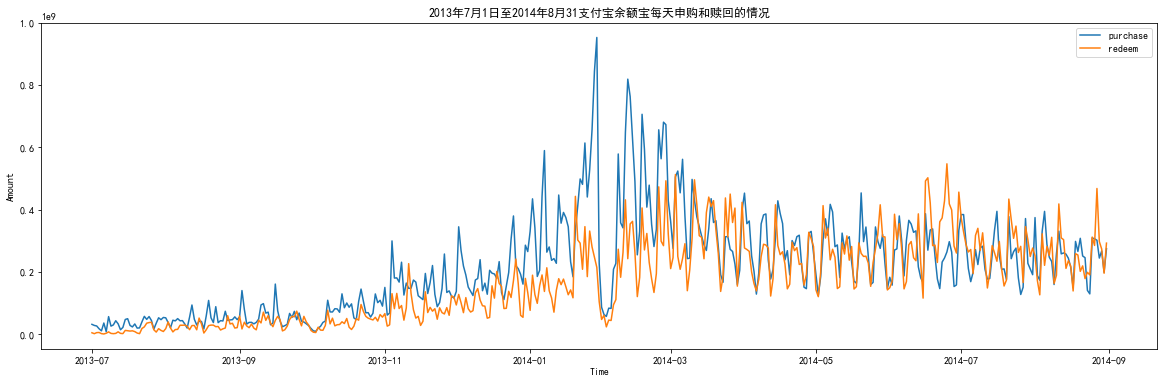

In [127]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

fig = plt.figure(figsize=(20,6))
plt.rcParams['font.sans-serif']=['Simhei'] # 中文正常显示
plt.plot(total_balance['date'],total_balance['total_purchase_amt'],label='purchase')
plt.plot(total_balance['date'],total_balance['total_redeem_amt'],label='redeem')

plt.legend(loc='best') # 图例
plt.title("2013年7月1日至2014年8月31支付宝余额宝每天申购和赎回的情况")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

No handles with labels found to put in legend.


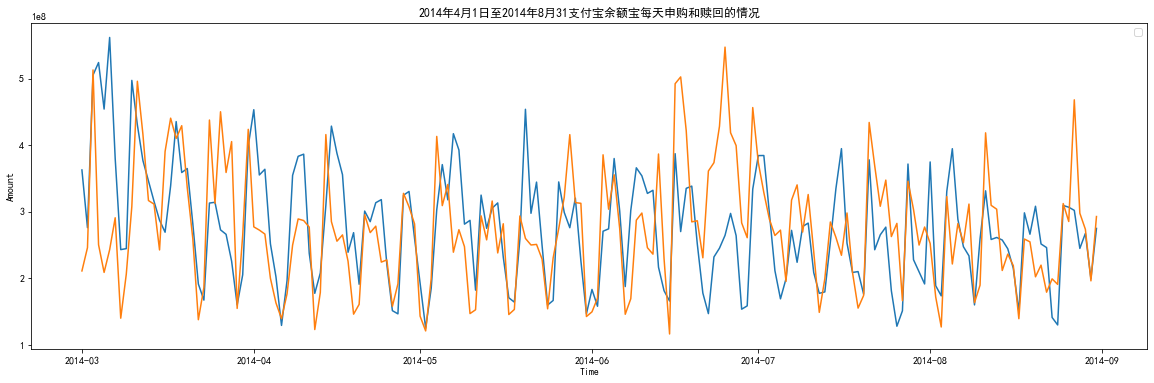

In [256]:
#绘制4月份以后的时间序列图
import datetime 

total_balance_1 = total_balance[total_balance['date'].dt.date >= datetime.date(2014,3,1)]

fig = plt.figure(figsize=(20,6))
plt.rcParams['font.sans-serif']=['Simhei'] 
plt.plot(total_balance_1['date'], total_balance_1['total_purchase_amt'])
plt.plot(total_balance_1['date'], total_balance_1['total_redeem_amt'])
plt.legend()
plt.title("2014年4月1日至2014年8月31支付宝余额宝每天申购和赎回的情况")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()

## 构建预测模型

### 传统参数法

参考资料：
- https://blog.csdn.net/qifeidemumu/article/details/88761964

#### 平稳性检验 

In [257]:
import statsmodels.api as sm

# 1、肉眼观察是否有规律：由图可知，有一定的规律，波形呈上升下降迭代的形式
# 2、单位根检验
def stability_test(time_series):
    result = sm.tsa.stattools.adfuller(time_series)
    print("ADF  Statistic:%f" % result[0])
    print("p-value : %f" % result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print("\t %s: %.3f" % (key, value))

for item in ['total_purchase_amt','total_redeem_amt']:
    print(item)
    stability_test(total_balance_1[item])
    print("--------------------------")

total_purchase_amt
ADF  Statistic:-3.898616
p-value : 0.002045
Critical Values:
	 1%: -3.469
	 5%: -2.879
	 10%: -2.576
--------------------------
total_redeem_amt
ADF  Statistic:-2.432317
p-value : 0.132822
Critical Values:
	 1%: -3.470
	 5%: -2.879
	 10%: -2.576
--------------------------


- total_purchase_amt的p值小于0.05,不存在单位根，是稳定性序列
- total_redeem_amt的p值大于0.05,存在单位根，不是稳定性序列

#### 差分

因为total_redeem_amt不是稳定性序列，所以要进行差分。

<AxesSubplot:xlabel='date'>

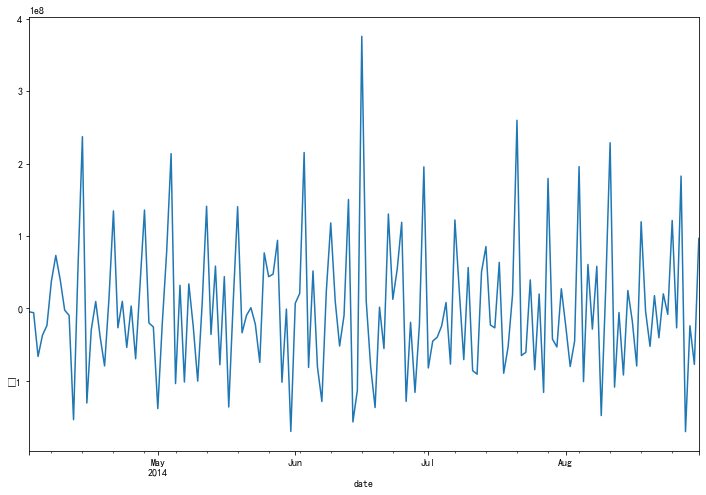

In [139]:
redeem_diff = total_balance_1['total_redeem_amt'].diff(1)
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
redeem_diff[1:].plot(ax=ax1)

In [140]:
redeem_diff[1:]

date
2014-04-02     -4817292.0
2014-04-03     -6006609.0
2014-04-04    -66412820.0
2014-04-05    -36992955.0
2014-04-06    -23622999.0
                 ...     
2014-08-27    182685584.0
2014-08-28   -170270286.0
2014-08-29    -24137481.0
2014-08-30    -77382246.0
2014-08-31     96568899.0
Name: total_redeem_amt, Length: 152, dtype: float64

In [141]:
stability_test(redeem_diff[1:]) # p值小于0.05，是稳定性序列了

ADF  Statistic:-12.421888
p-value : 0.000000
Critical Values:
	 1%: -3.476
	 5%: -2.882
	 10%: -2.577


#### 白噪音检验

In [246]:
data = sm.datasets.sunspots.load_pandas().data
res = sm.tsa.ARMA(data["SUNACTIVITY"], (1,1)).fit(disp=-1)
print(res.resid)

0     -43.797401
1      -0.450229
2      -4.804481
3       0.709076
4       5.812288
         ...    
304    -2.754618
305   -11.390381
306   -13.708504
307    -9.466289
308   -10.606602
Length: 309, dtype: float64


In [33]:
print(total_balance_1[item])

274    277429358
275    272612066
276    266605457
277    200192637
278    163199682
         ...    
422    468164147
423    297893861
424    273756380
425    196374134
426    292943033
Name: total_redeem_amt, Length: 153, dtype: int64


In [247]:
# LB检验和Q检验
for item in ['total_purchase_amt','total_redeem_amt']:
    print(item)
    print(sm.stats.acorr_ljungbox(total_balance_1[item], lags=[i for i in range(1,10)], return_df=True))
    print("--------------------------")

total_purchase_amt
      lb_stat     lb_pvalue
1  105.481199  9.580259e-25
2  132.675200  1.548626e-29
3  139.065234  6.011839e-30
4  142.769471  7.205270e-30
5  148.410064  2.910228e-30
6  162.048364  2.180535e-32
7  184.178374  2.552351e-36
8  188.535393  1.655350e-36
9  188.726917  7.601065e-36
--------------------------
total_redeem_amt
      lb_stat     lb_pvalue
1   53.445362  2.658858e-13
2   65.903977  4.888023e-15
3   70.632593  3.124590e-15
4   75.022376  1.970992e-15
5   76.892548  3.745174e-15
6   87.411126  1.044301e-16
7  123.649888  1.329626e-23
8  133.476278  5.378110e-25
9  133.690145  2.063680e-24
--------------------------


lags从1-10，lb-pvalue均小于0.05，所以不是白噪音序列。

###### 绘制acf和pacf图

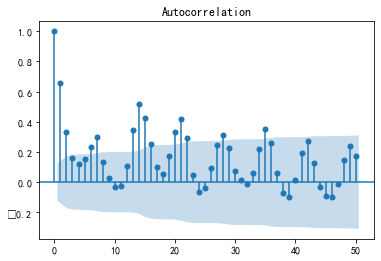

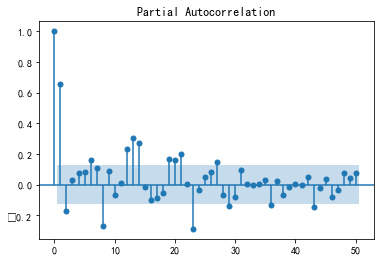

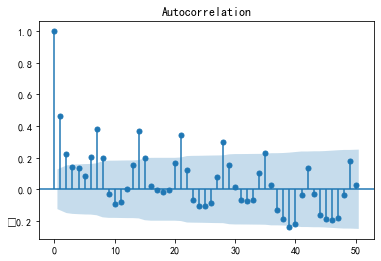

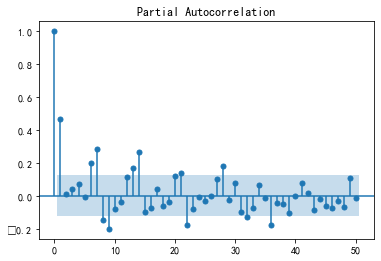

In [248]:
def acf_pacf_plot(ts_log_diff):
    sm.graphics.tsa.plot_acf(ts_log_diff,lags=50) #ARMA,q
    sm.graphics.tsa.plot_pacf(ts_log_diff,lags=50) #ARMA,p

for item in ['total_purchase_amt','total_redeem_amt']:
    acf_pacf_plot(total_balance_1[item]) 

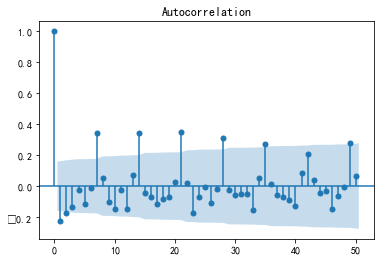

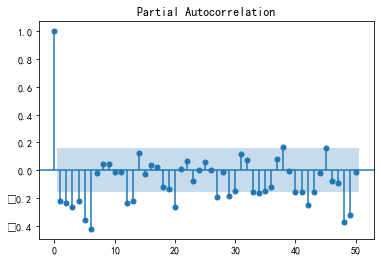

In [63]:
acf_pacf_plot(redeem_diff[1:]) 

#### 借助AIC、BIC统计量自动确定p和q

In [ ]:
##借助AIC、BIC统计量自动确定
from statsmodels.tsa.arima_model import ARMA
def proper_model(data_ts, maxLag): 
    init_bic = float("inf")
    init_p = 0
    init_q = 0
    init_properModel = None
    for p in np.arange(maxLag):
        for q in np.arange(maxLag):
            model = ARMA(data_ts, order=(p, q))
            try:
                results_ARMA = model.fit(disp=-1, method='css')
            except:
                continue
            bic = results_ARMA.bic
            if bic < init_bic:
                init_p = p
                init_q = q
                init_properModel = results_ARMA
                init_bic = bic
    return init_bic, init_p, init_q, init_properModel
 
proper_model(trainSeting,40)

In [258]:
# or statsmodels里还有更直接的函数

"""
我们常用的是AIC准则，AIC鼓励数据拟合的优良性但是尽量避免出现过度拟合(Overfitting)的情况。所以优先考虑的模型应是AIC值最小的那一个模型。
为了控制计算量，我们限制AR最大阶不超过5，MA最大阶不超过5。 但是这样带来的坏处是可能为局部最优。
timeseries是待输入的时间序列，是pandas.Series类型，max_ar、max_ma是p、q值的最大备选值。
order.bic_min_order返回以BIC准则确定的阶数，是一个tuple类型
"""
import warnings
warnings.filterwarnings("ignore")
import statsmodels.tsa.stattools as st
order = st.arma_order_select_ic(total_balance_1['total_purchase_amt'],max_ar=5,max_ma=5,ic=['aic', 'bic', 'hqic']) # 3,2
order.bic_min_order

(3, 3)

In [249]:
order = st.arma_order_select_ic(total_balance_1['total_redeem_amt'],max_ar=5,max_ma=5,ic=['aic', 'bic', 'hqic']) # 4,2
order.bic_min_order

(5, 5)

#### 构建ARMA模型

In [54]:
# 'total_purchase_amt'
print(sm.tsa.ARMA(total_balance_1['total_purchase_amt'],(3,2)).fit(disp=-1).summary()) # disp表示显示或者不显示输出信息

                              ARMA Model Results                              
Dep. Variable:     total_purchase_amt   No. Observations:                  153
Model:                     ARMA(3, 2)   Log Likelihood               -2951.065
Method:                       css-mle   S.D. of innovations       56223857.498
Date:                Wed, 28 Jul 2021   AIC                           5916.130
Time:                        16:39:15   BIC                           5937.343
Sample:                             0   HQIC                          5924.747
                                                                              
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2.643e+08   5.54e+06     47.722      0.000    2.53e+08    2.75e+08
ar.L1.total_purchase_amt     1.4643      0.110     13.367      0.000       1.250       1.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


AR.1和MA.1对应的行中Modulus列的值大于1，表示模型正确。

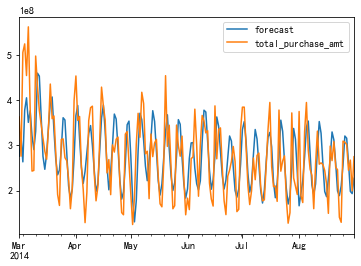

In [259]:
fig = sm.tsa.ARMA(total_balance_1['total_purchase_amt'], (3,3)).fit(disp=-1).plot_predict()

In [80]:
len(total_balance_1['total_purchase_amt'])

153

In [79]:
total_balance_1['total_purchase_amt'].head(5)

274    453320585
275    355347118
276    363877120
277    251895894
278    202336542
Name: total_purchase_amt, dtype: int64

In [82]:
total_balance_1['total_purchase_amt']

274    453320585
275    355347118
276    363877120
277    251895894
278    202336542
         ...    
422    302194801
423    245082751
424    267554713
425    199708772
426    275090213
Name: total_purchase_amt, Length: 153, dtype: int64

In [129]:
total_balance_1['total_purchase_amt'].head()

date
2014-04-01    453320585
2014-04-02    355347118
2014-04-03    363877120
2014-04-04    251895894
2014-04-05    202336542
Name: total_purchase_amt, dtype: int64

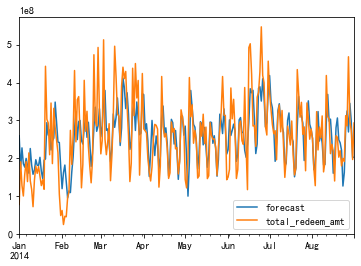

In [250]:
fig = sm.tsa.ARMA(total_balance_1['total_redeem_amt'], (5,5)).fit(disp=-1).plot_predict()

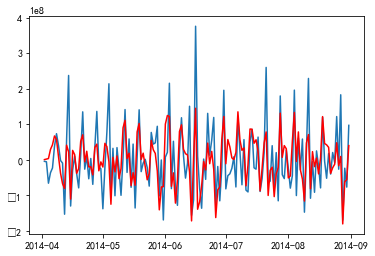

In [142]:
# redeem_diff[1:]
# 'total_redeem_amt' 

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(total_balance_1['total_redeem_amt'],order=(2,1,3)).fit(disp=-1) #第二个参数代表使用了一阶差分
# pred = model.predict(start=pd.to_datetime('20140901',format='%Y-%m-%d').date(),end=pd.to_datetime('20140930',format='%Y-%m-%d').date(),dynamic=False)

# plt.plot(pred)
# total_balance_1['total_redeem_amt'] redeem_diff[1:]
# pd.to_datetime('2013-07-01').date()

plt.plot(redeem_diff[1:])
plt.plot(model.fittedvalues, color='red')
plt.show()

In [173]:
model.fittedvalues

date
2014-04-02    1.020637e+05
2014-04-03    1.621566e+06
2014-04-04    2.996774e+06
2014-04-05    2.853882e+07
2014-04-06    4.185945e+07
                  ...     
2014-08-27    8.936021e+06
2014-08-28   -1.810896e+08
2014-08-29   -6.239195e+07
2014-08-30   -5.595963e+07
2014-08-31    3.950644e+07
Length: 152, dtype: float64

In [216]:
sm.tsa.ARMA(redeem_diff[1:], (2,3)).fit(disp=-1).predict()

2014-04-02    1.020637e+05
2014-04-03    1.621566e+06
2014-04-04    2.996774e+06
2014-04-05    2.853882e+07
2014-04-06    4.185945e+07
                  ...     
2014-08-27    8.936021e+06
2014-08-28   -1.810896e+08
2014-08-29   -6.239195e+07
2014-08-30   -5.595963e+07
2014-08-31    3.950644e+07
Freq: D, Length: 152, dtype: float64

In [196]:
temp = pd.DataFrame(sm.tsa.ARMA(redeem_diff[1:], (2,3)).fit(disp=-1).predict()) # sm.tsa.ARMA(redeem_diff[1:], (2,3)).fit(disp=-1).predict() # model.fittedvalues
temp.reset_index(inplace=True)
temp.rename(columns={0:'total_redeem_amt'},inplace=True)
# temp.index = temp.index + 1

df1 = pd.DataFrame(total_balance_1['total_redeem_amt'])
df1.reset_index(inplace=True)
df1 = df1.head(1)

whole = pd.concat([df1,temp], ignore_index=True)

whole

,date,total_redeem_amt
0,2014-04-01,2.774294e+08
1,2014-04-02,1.020637e+05
2,2014-04-03,1.621566e+06
3,2014-04-04,2.996774e+06
4,2014-04-05,2.853882e+07
...,...,...
148,2014-08-27,8.936021e+06
149,2014-08-28,-1.810896e+08
150,2014-08-29,-6.239195e+07
151,2014-08-30,-5.595963e+07


In [198]:
# 反差分
def inv_diff(diff_df):
    """
    差分序列的索引从1开始
    """
    for i in range(1,len(diff_df)):
        diff_df.loc[i,'total_redeem_amt'] += diff_df.loc[i-1,'total_redeem_amt']
    return diff_df
# df1 = df.diff(1)
# df1.dropna(inplace=True)
predict_origin = inv_diff(whole)
print(predict_origin)

          date  total_redeem_amt
0   2014-04-01      2.774294e+08
1   2014-04-02      2.775314e+08
2   2014-04-03      2.791530e+08
3   2014-04-04      2.821498e+08
4   2014-04-05      3.106886e+08
..         ...               ...
148 2014-08-27      4.377371e+08
149 2014-08-28      2.566475e+08
150 2014-08-29      1.942556e+08
151 2014-08-30      1.382959e+08
152 2014-08-31      1.778024e+08

[153 rows x 2 columns]


In [200]:
total_balance_1['total_redeem_amt']

date
2014-04-01    277429358
2014-04-02    272612066
2014-04-03    266605457
2014-04-04    200192637
2014-04-05    163199682
                ...    
2014-08-27    468164147
2014-08-28    297893861
2014-08-29    273756380
2014-08-30    196374134
2014-08-31    292943033
Name: total_redeem_amt, Length: 153, dtype: int64

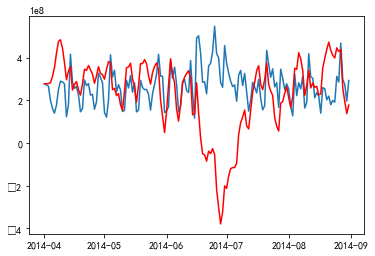

In [226]:
pred = predict_origin.set_index("date",drop=True) 
plt.plot(total_balance_1['total_redeem_amt'])
plt.plot(pred['total_redeem_amt'], color='red')
plt.show()

#### 计算相对误差

In [253]:
err = total_balance_1['total_redeem_amt'] - sm.tsa.ARMA(total_balance_1['total_redeem_amt'], (5,5)).fit(disp=-1).predict()
average_err = sum(abs(err)/total_balance_1['total_redeem_amt'])/len(total_balance_1['total_redeem_amt'])
print(average_err)  # 相对误差大也不一定效果就差

0.2808051039570056


In [211]:
err = redeem_diff[1:] - model.fittedvalues
average_err = sum(abs(err)/redeem_diff[1:])/len(redeem_diff[1:])
print(average_err) 

0.3763097014421918


In [260]:
err = total_balance_1['total_purchase_amt'] - sm.tsa.ARMA(total_balance_1['total_purchase_amt'], (3,3)).fit(disp=-1).predict()
average_err = sum(abs(err)/total_balance_1['total_purchase_amt'])/len(total_balance_1['total_purchase_amt'])
print(average_err) 
# 1,1 -> 0.24
# 3,2 -> 0.18

0.18919847097838052


#### 预测

In [261]:
model = sm.tsa.ARMA(total_balance_1['total_purchase_amt'], (3,3)).fit(disp=-1)
y = model.forecast(steps=30)[0]

In [262]:
print(y)

[3.01957838e+08 3.48062399e+08 3.42690094e+08 2.89651497e+08
 2.28760277e+08 2.05775936e+08 2.37859703e+08 3.00619798e+08
 3.46524151e+08 3.40780200e+08 2.87596706e+08 2.27003962e+08
 2.04633929e+08 2.37273261e+08 3.00192089e+08 3.45812647e+08
 3.39624184e+08 2.86232615e+08 2.25881454e+08 2.04071488e+08
 2.37213269e+08 3.00240214e+08 3.45531769e+08 3.38860933e+08
 2.85230010e+08 2.25092593e+08 2.03814916e+08 2.37430159e+08
 3.00536633e+08 3.45474087e+08]


In [251]:
model = sm.tsa.ARMA(total_balance_1['total_redeem_amt'], (5,5)).fit(disp=-1)
y_redeem = model.forecast(steps=30)[0]

In [229]:
print(y_redeem)

[2.92840525e+08 3.29597535e+08 3.28585908e+08 2.89004649e+08
 2.35764120e+08 2.07240926e+08 2.23908342e+08 2.72827289e+08
 3.17085238e+08 3.23395174e+08 2.87001695e+08 2.35203341e+08
 2.06846094e+08 2.23176485e+08 2.71915715e+08 3.16488610e+08
 3.23468898e+08 2.87645549e+08 2.35912505e+08 2.07078214e+08
 2.22752712e+08 2.71151832e+08 3.15956534e+08 3.23566942e+08
 2.88299496e+08 2.36631420e+08 2.07322824e+08 2.22339841e+08
 2.70391531e+08 3.15419222e+08]


In [264]:
import csv
out = open(data_path+"/comp_predict_table.csv",'w', newline='')
csv_write = csv.writer(out,dialect='excel')
for i in range(30):
    temp = 20140901 + i
    row = [str(temp),int(y[i]),int(y_redeem[i])]
    print(row)
    csv_write.writerow(row)

['20140901', 301957838, 334277962]
['20140902', 348062398, 357620566]
['20140903', 342690094, 317329720]
['20140904', 289651497, 319220923]
['20140905', 228760277, 292968272]
['20140906', 205775935, 204597763]
['20140907', 237859703, 205472051]
['20140908', 300619797, 304850674]
['20140909', 346524150, 333345520]
['20140910', 340780199, 296676503]
['20140911', 287596705, 301259943]
['20140912', 227003961, 278347854]
['20140913', 204633928, 191638956]
['20140914', 237273261, 191999540]
['20140915', 300192088, 292424134]
['20140916', 345812646, 323884076]
['20140917', 339624184, 288960940]
['20140918', 286232615, 294584121]
['20140919', 225881454, 273579909]
['20140920', 204071488, 187315181]
['20140921', 237213268, 186068060]
['20140922', 300240213, 286534218]
['20140923', 345531768, 320105845]
['20140924', 338860933, 286216634]
['20140925', 285230010, 292242919]
['20140926', 225092593, 272599755]
['20140927', 203814915, 186335141]
['20140928', 237430159, 183062055]
['20140929', 3005366

#### 残差序列检验